In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# @title Imports
# imports
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import requests

try:
    from tqdm import tqdm
except ImportError:
    tqdm = lambda x, total, unit: x  # If tqdm doesn't exist, replace it with a function that does nothing
    print('**** Could not import tqdm. Please install tqdm for download progressbars! (pip install tqdm) ****')

# Python2 compatibility
try:
    input = raw_input
except NameError:
    pass

download_dict = {
    '1) Kuzushiji-MNIST (10 classes, 28x28, 70k examples)': {
        '1) MNIST data format (ubyte.gz)':
            ['http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-images-idx3-ubyte.gz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-labels-idx1-ubyte.gz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-images-idx3-ubyte.gz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-labels-idx1-ubyte.gz'],
        '2) NumPy data format (.npz)':
            ['http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-labels.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-labels.npz'],
    },
    '2) Kuzushiji-49 (49 classes, 28x28, 270k examples)': {
        '1) NumPy data format (.npz)':
            ['http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-labels.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-labels.npz'],
    },
    '3) Kuzushiji-Kanji (3832 classes, 64x64, 140k examples)': {
        '1) Folders of images (.tar)':
            ['http://codh.rois.ac.jp/kmnist/dataset/kkanji/kkanji.tar'],
    }

}

# Download a list of files
def download_list(url_list):
    for url in url_list:
        path = url.split('/')[-1]
        r = requests.get(url, stream=True)
        with open(path, 'wb') as f:
            total_length = int(r.headers.get('content-length'))
            print('Downloading {} - {:.1f} MB'.format(path, (total_length / 1024000)))

            for chunk in tqdm(r.iter_content(chunk_size=1024), total=int(total_length / 1024) + 1, unit="KB"):
                if chunk:
                    f.write(chunk)
    print('All dataset files downloaded!')

# Ask the user about which path to take down the dict
def traverse_dict(d):
    print('Please select a download option:')
    keys = sorted(d.keys())  # Print download options
    for key in keys:
        print(key)

    userinput = input('> ').strip()

    try:
        selection = int(userinput) - 1
    except ValueError:
        print('Your selection was not valid')
        traverse_dict(d)  # Try again if input was not valid
        return

    selected = keys[selection]

    next_level = d[selected]
    if isinstance(next_level, list):  # If we've hit a list of downloads, download that list
        download_list(next_level)
    else:
        traverse_dict(next_level)     # Otherwise, repeat with the next level

traverse_dict(download_dict)

Please select a download option:
1) Kuzushiji-MNIST (10 classes, 28x28, 70k examples)
2) Kuzushiji-49 (49 classes, 28x28, 270k examples)
3) Kuzushiji-Kanji (3832 classes, 64x64, 140k examples)
> 1
Please select a download option:
1) MNIST data format (ubyte.gz)
2) NumPy data format (.npz)
> 2


100%|██████████| 17954/17954 [00:19<00:00, 935.92KB/s] 


100%|██████████| 30/30 [00:00<00:00, 192.37KB/s]


100%|██████████| 3008/3008 [00:03<00:00, 817.67KB/s]


100%|██████████| 6/6 [00:00<00:00, 11613.21KB/s]

All dataset files downloaded!


In [48]:
# @title Data loading and preprocessing
data1 = np.load("/content/kmnist-test-imgs.npz")

# Extract arrays from the .npz file
X_test = data1['arr_0']

# Example usage
print("Shape of X_test:", X_test.shape)
data2 = np.load("/content/kmnist-test-labels.npz")

# Extract arrays from the .npz file
y_test = data2['arr_0']

# Example usage
print("Shape of y_test:", y_test.shape)

data3 = np.load("/content/kmnist-train-imgs.npz")

# Extract arrays from the .npz file
X_train = data3['arr_0']

# Example usage
print("Shape of X_train:", X_train.shape)

data4 = np.load("/content/kmnist-train-labels.npz")

# Extract arrays from the .npz file
y_train = data4['arr_0']

# Example usage
print("Shape of y_train:", y_train.shape)

# Define the ratio for splitting
val_ratio = 0.1  # 10% of the data will be used for validation

# Split the training data into training and validation sets
# Define the ratio for splitting
val_ratio = 0.1  # 10% of the data will be used for validation

# Calculate the number of samples for validation
num_val_samples = int(len(X_train) * val_ratio)

# Split the training data into training and validation sets
X_val = X_train[:num_val_samples]
y_val = y_train[:num_val_samples]
X_train = X_train[num_val_samples:]
y_train = y_train[num_val_samples:]
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

# Normalize the data
X_train = X_train.astype('float32') / 255
X_test1 = X_test.astype('float32') / 255

X_val = X_val.astype('float32') / 255

# Flatten the data to one-dimensional arrays
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_test1 = X_test.reshape(X_test1.shape[0], -1)

# One-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = np.eye(num_classes)[y_train]
y_val = np.eye(num_classes)[y_val]
y_test1 = np.eye(num_classes)[y_test]


# Example usage
print("Shape of X_train_flat:", X_train.shape)
print("Shape of X_val_flat:", X_val.shape)
print("Shape of y_train_onehot:", y_train.shape)
print("Shape of y_val_onehot:", y_val.shape)
print("Shape of y_test_onehot:", y_test.shape)

Shape of y_test_onehot: (10000,)


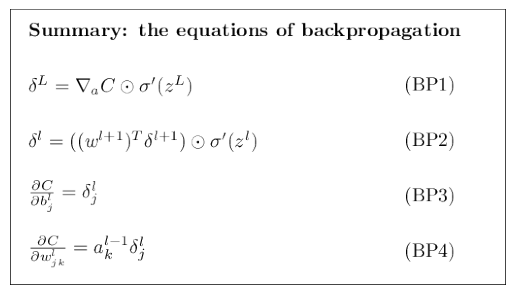

In [7]:
# @title Equations used for back propagation
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('/content/drive/MyDrive/PRNN/A2/tikz21.png')

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()


In [8]:
# @title MLP class definition for mnist
class MLPmnistClassifier(object):
    def __init__(self, lr=1e-2, epochs=100, loss_fn='cross_entropy_loss',activation_funcs=['relu', 'relu', 'relu'], layers=[5, 5, 5, 3], l1_reg=0.01,l2_reg=0.01):
        """
        Initialiser function for a class instance

        Inputs:
            lr              -> learning rate
            epochs          -> number of epochs to use during training
            activation_funcs-> list of activation functions for each layer
            layers          -> list containing number of nodes in each layer
            l2_reg          -> L2 regularization parameter
        """
        self.lr = lr
        self.epochs = epochs
        self.activation_funcs = activation_funcs
        self.loss_fn=loss_fn
        self.layers = layers
        self.l2_reg = l2_reg
        self.l1_reg=l1_reg
        self.weights = []
        self.biases = []
        self.train_loss = []
        self.val_loss = []
        self.loss = []
    def __del__(self):
        """
        Destructor function for a class instance
        """
        del self.lr
        del self.epochs
        del self.layers
        del self.biases
        del self.train_loss
        del self.val_loss
        del self.loss

    def _hinge_loss(self, y_true, y_pred):
        """
        Function to compute hinge loss for binary classification

        Inputs:
            y_true -> numpy array of true labels
            y_pred -> numpy array of predicted probabilities
        Output:
            loss value
        """
        return np.mean(np.maximum(0, 1 - y_true * y_pred))

    def _cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-8

        # Compute the categorical cross-entropy loss
        loss = -np.mean(y_true * np.log(y_pred + epsilon))

        return loss

    def _weighted_cross_entropy_loss(self, y_true, y_pred, class_weights):
        """
        Function to compute weighted cross entropy loss for binary classification

        Inputs:
            y_true        -> numpy array of true labels
            y_pred        -> numpy array of predicted probabilities
            class_weights -> list of class weights
        Output:
            loss value
        """
        return -np.mean(class_weights[0] * y_true * np.log(y_pred + 1e-8) + class_weights[1] * (1 - y_true) * np.log(1 - y_pred + 1e-8))

    def _loss(self, y_true, y_pred, loss_fn):
        """
        Function to compute loss based on the specified loss function

        Inputs:
            y_true   -> numpy array of true labels
            y_pred   -> numpy array of predicted values
            loss_fn  -> string indicating the loss function to be used
                        Options: 'hinge_loss', 'cross_entropy_loss', 'mse_loss'
        Output:
            loss value
        """
        if loss_fn == 'hinge_loss':
            hinge_loss = self._hinge_loss(y_true, y_pred)
            # Compute L1 regularization term
            l1_reg_term = self.l1_reg * sum(np.sum(np.abs(w)) for w in self.weights)
            # Compute L2 regularization term
            l2_reg_term = 0.5 * self.l2_reg * sum(np.sum(np.square(w)) for w in self.weights)
            # Add regularization terms to the loss
            total_loss = hinge_loss + l1_reg_term + l2_reg_term
            return total_loss
        elif loss_fn == 'cross_entropy_loss':
            cross_entropy_loss = self._cross_entropy_loss(y_true, y_pred)
            # Compute L1 regularization term
            l1_reg_term = self.l1_reg * sum(np.sum(np.abs(w)) for w in self.weights)
            # Compute L2 regularization term
            l2_reg_term = 0.5 * self.l2_reg * sum(np.sum(np.square(w)) for w in self.weights)
            # Add regularization terms to the loss
            total_loss = cross_entropy_loss + l1_reg_term + l2_reg_term
            return total_loss
        elif loss_fn == 'mse_loss':
            mse_loss = 0.5 * np.square(y_true - y_pred)
            # Compute L1 regularization term
            l1_reg_term = self.l1_reg * sum(np.sum(np.abs(w)) for w in self.weights)
            # Compute L2 regularization term
            l2_reg_term = 0.5 * self.l2_reg * sum(np.sum(np.square(w)) for w in self.weights)
            # Add regularization terms to the loss
            total_loss = np.mean(mse_loss) + l1_reg_term + l2_reg_term
            return total_loss
        else:
            raise ValueError("Invalid loss function. Supported options: 'hinge_loss', 'cross_entropy_loss', 'mse_loss'")





    def _derivative_hinge_loss(self, y_true, y_pred):
        """
        Function to compute the derivative of hinge loss for binary classification

        Inputs:
            y_true -> numpy array of true labels
            y_pred -> numpy array of predicted probabilities
        Output:
            derivative of loss
        """
        return np.where(y_true * y_pred < 1, -y_true, 0)

    def _derivative_cross_entropy_loss(self, y_true, y_pred):
        """
        Function to compute the derivative of sigmoid cross entropy loss for binary classification

        Inputs:
            y_true -> numpy array of true labels
            y_pred -> numpy array of predicted probabilities
        Output:
            derivative of loss
        """
        return y_pred - y_true

    def _derivative_weighted_cross_entropy_loss(self, y_true, y_pred, class_weights):
        """
        Function to compute the derivative of weighted cross entropy loss for binary classification

        Inputs:
            y_true        -> numpy array of true labels
            y_pred        -> numpy array of predicted probabilities
            class_weights -> list of class weights
        Output:
            derivative of loss
        """
        return class_weights[0] * (y_pred - y_true) * y_true + class_weights[1] * (y_pred - y_true) * (1 - y_true)

    def _derivative_loss(self, y_true, y_pred, loss_fn):
        """
        Function to compute the derivative of the loss function based on the specified loss function

        Inputs:
            y_true   -> numpy array of true labels
            y_pred   -> numpy array of predicted probabilities
            loss_fn  -> string specifying the loss function ('hinge_loss', 'cross_entropy_loss', 'weighted_cross_entropy_loss')
        Output:
            derivative of loss
        """
        if loss_fn == 'hinge_loss':
            return self._derivative_hinge_loss(y_true, y_pred)
        elif loss_fn == 'cross_entropy_loss':
            return self._derivative_cross_entropy_loss(y_true, y_pred)

    def _softmax(self, z):
        """
        Function to compute softmax activation function for multiclass classification

        Input:
            z -> input dot product w*x + b
        Output:
            determined activation
        """
        exp_z = np.exp(z - np.max(z, axis=0))  # Subtracting max(z) for numerical stability
        return exp_z / np.sum(exp_z, axis=0)

    def _derivative_softmax(self, z):
        """
        Function to compute the derivative of the softmax activation function

        Input:
            z -> input dot product w*x + b
        Output:
            determined derivative of activation
        """
        softmax = self._softmax(z)
        return softmax * (1 - softmax)


    def _sigmoid(self, z):
        """
        Function to compute sigmoid activation function

        Input:
            z -> input dot product w*x + b
        Output:
            determined activation
        """
        return 1 / (1 + np.exp(-z))

    def _derivative_sigmoid(self, z):
        """
        Function to compute the derivative of the sigmoid activation function

        Input:
            z -> input dot product w*x + b
        Output:
            determined derivative of activation
        """
        return self._sigmoid(z) * (1 - self._sigmoid(z))

    def _linear(self, z):
        """
        Function to compute linear activation function

        Input:
            z -> input dot product w*x + b
        Output:
            determined activation
        """
        return z

    def _derivative_linear(self, z):
        """
        Function to compute the derivative of the linear activation function

        Input:
            z -> input dot product w*x + b
        Output:
            determined derivative of activation
        """
        return np.ones(z.shape)

    def _relu(self, z):
        """
        Function to compute ReLU activation function

        Input:
            z -> input dot product w*x + b
        Output:
            determined activation
        """
        return np.maximum(0, z)

    def _derivative_relu(self, z):
        """
        Function to compute the derivative of the ReLU activation function

        Input:
            z -> input dot product w*x + b
        Output:
            determined derivative of activation
        """
        return np.where(z > 0, 1, 0)

    def _tanh(self, z):
        """
        Function to compute Hyperbolic Tangent (tanh) activation function

        Input:
            z -> input dot product w*x + b
        Output:
            determined activation
        """
        return np.tanh(z)

    def _derivative_tanh(self, z):
        """
        Function to compute the derivative of the Hyperbolic Tangent (tanh) activation function

        Input:
            z -> input dot product w*x + b
        Output:
            determined derivative of activation
        """
        return 1 - np.tanh(z) ** 2

    def _activate(self, z, activation_func):
        """
        Function to apply activation function based on given activation_func parameter

        Inputs:
            z -> input dot product w*x + b
            activation_func -> string representing the activation function ('sigmoid', 'linear', 'relu', 'tanh')
        Output:
            determined activation
        """
        if activation_func == 'sigmoid':
            return self._sigmoid(z)
        elif activation_func == 'linear':
            return self._linear(z)
        elif activation_func == 'relu':
            return self._relu(z)


        elif activation_func == 'tanh':
                return self._tanh(z)
        else:
            # Default to linear activation
            return self._linear(z)

    def _derivative_activate(self, z, activation_func):
        """
        Function to compute the derivative of the activation function

        Inputs:
            z -> input dot product w*x + b
            activation_func -> string representing the activation function ('sigmoid', 'linear', 'relu', 'tanh')
        Output:
            determined derivative of activation
        """
        if activation_func == 'sigmoid':
            return self._derivative_sigmoid(z)
        elif activation_func == 'linear':
            return self._derivative_linear(z)
        elif activation_func == 'relu':
            return self._derivative_relu(z)
        elif activation_func == 'tanh':
            return self._derivative_tanh(z)
        else:
            # Default to derivative of linear activation
            return self._derivative_linear(z)

    def _forward_pass(self, X):
        """
        Function to perform forward pass through the network

        Input:
            X -> numpy array of input predictive features with assumed shape [number_features, number_samples]
        Output:
            list of activations & derivatives for each layer
        """
        # record from input layer
        input_to_layer = np.copy(X)
        activations = [input_to_layer]
        derivatives = [np.zeros(X.shape)]

        for i in range(len(self.layers) - 2):
            # Compute the input to the current hidden layer

            z_i = np.matmul(self.weights[i], input_to_layer) + self.biases[i]
            # Apply activation function to the input
            input_to_layer = self._activate(z_i, self.activation_funcs[i])
            # Store activation and derivative
            activations.append(input_to_layer)
            derivatives.append(self._derivative_activate(z_i, self.activation_funcs[i]))

        # Compute the input to the output layer
        z_i = np.matmul(self.weights[-1], input_to_layer) + self.biases[-1]
        # Apply linear activation function for the output layer
        input_to_layer = self._activate(z_i, self.activation_funcs[-1])
        # Store activation and derivative for the output layer
        activations.append(input_to_layer)
        derivatives.append(self._derivative_activate(z_i, self.activation_funcs[-1]))
        # return results
        return activations, derivatives

    def _backward_pass(self, activations, derivatives, y):
        """
        Function to perform backward pass through the network

        Inputs:
            activations -> list of activations from each layer in the network
            derivatives -> list of derivatives from each layer in the network
            y           -> numpy array of target values
                          with assumed shape [output dimension, number_samples]
        Output:
            list of numpy arrays containing the derivates of the loss function wrt layer weights
        """
        # record loss
        self.loss.append((1 / y.shape[1]) * np.sum(self._loss(y, activations[-1],self.loss_fn)))

        # Initialize lists to store gradients
        dl_dw = []
        dl_db = []

        # Output layer gradients
        #BP1 equation
        dl_dy = self._derivative_loss(y, activations[-1],self.loss_fn)
        dl_dz = np.multiply(dl_dy, derivatives[-1])
        #BP4 equation
        dl_dw.append((1 / y.shape[1]) * np.matmul(dl_dz, activations[-2].T))
        #BP3 equation
        dl_db.append((1 / y.shape[1]) * np.sum(dl_dz, axis=1))


        # Backpropagation through hidden layers
        for i in range(len(self.layers) - 2, 0, -1):
            # Compute gradients
            #BP2 equation
            dl_dy = np.matmul(self.weights[i].T, dl_dz)
            dl_dz = np.multiply(dl_dy, derivatives[i])
            #BP4 equation
            dl_dw.append((1 / y.shape[1]) * np.matmul(dl_dz, activations[i - 1].T))
            #BP3 equation
            dl_db.append((1 / y.shape[1]) * np.sum(dl_dz, axis=1))

        # Reverse the lists to maintain the order
        dl_dw = dl_dw[::-1]
        dl_db = dl_db[::-1]

        # Return gradients
        return dl_dw, dl_db

    def _update_weights(self, dl_dw, dl_db):
        """
        Function to apply update rule to model with L1 and L2 regularization

        Inputs:
            dl_dw -> list of numpy arrays containing loss derivatives wrt weights
            dl_db -> list of numpy arrays containing loss derivatives wrt biases
        """
        # Update weights and biases for input layer with L1 and L2 regularization
        self.weights[0] -= self.lr * (dl_dw[0] + self.l1_reg * np.sign(self.weights[0]) + self.l2_reg * self.weights[0])
        self.biases[0] -= self.lr * dl_db[0].reshape(-1, 1)

        # Update weights and biases for hidden layers with L1 and L2 regularization
        for i in range(1, len(self.layers) - 1):
            self.weights[i] -= self.lr * (dl_dw[i] + self.l1_reg * np.sign(self.weights[i]) + self.l2_reg * self.weights[i])
            self.biases[i] -= self.lr * dl_db[i].reshape(-1, 1)

        # Update weights and biases for output layer with L1 and L2 regularization
        self.weights[-1] -= self.lr * (dl_dw[-1] + self.l1_reg * np.sign(self.weights[-1]) + self.l2_reg * self.weights[-1])
        self.biases[-1] -= self.lr * dl_db[-1].reshape(-1, 1)
    def _compute_class_wise_accuracy(self,predictions, true_labels):
        """
        Function to compute class-wise accuracy for multiclass classification

        Inputs:
            predictions -> numpy array of predicted class labels (one-hot encoded)
            true_labels -> numpy array of true class labels (one-hot encoded)
        Output:
            class_wise_accuracy -> dictionary containing class-wise accuracy values
        """
        # Get the number of classes
        num_classes = true_labels.shape[1]
        predicted_labels = np.argmax(predictions, axis=1)
        class_wise_accuracy = {}


        # Initialize dictionary to store class-wise accuracy
        true_indices = np.argmax(true_labels, axis=1)

        # Compute accuracy for each class
        for cls in range(num_classes):
            # Extract predictions and true labels for the current class
            class_indices = np.where(true_indices == cls)[0]
            class_predictions = predicted_labels[class_indices]
            class_true_indices = true_indices[class_indices]

            # Compute accuracy for the current class
            class_accuracy = np.mean(class_predictions == class_true_indices)

            # Store the accuracy for the current class
            class_wise_accuracy[cls] = class_accuracy

        return class_wise_accuracy


    def fit(self, X_train, y_train, X_val, y_val, batch_size=32, early_stopping=False, patience=10):
        """
        Function to train a class instance with early stopping based on validation loss

        Inputs:
            X_train -> numpy array of input predictive features for training
                      with assumed shape [number_samples, number_features]
            y_train -> numpy array of target values for training
                      with assumed shape [number_samples, output dimension]
            X_val   -> numpy array of input predictive features for validation
                      with assumed shape [number_samples, number_features]
            y_val   -> numpy array of target values for validation
                      with assumed shape [number_samples, output dimension]
            batch_size -> size of each batch for batch training
        """
        # Initialize the model parameters

        best_val_accuracy = 0  # Initialize best validation accuracy
        epochs_without_improvement = 0  # Initialize counter for epochs without improvement
        accuracy_margin=0.01
        self.weights.clear()
        self.biases.clear()
        self.loss.clear()
        for idx in range(len(self.layers) - 1):
            self.weights.append(np.random.randn(self.layers[idx + 1], self.layers[idx]) * 0.1)
            self.biases.append(np.random.randn(self.layers[idx + 1], 1) * 0.1)

        train_losses = []  # List to store training losses
        val_losses = []    # List to store validation losses
        train_class_accuracy = []  # List to store training class-wise accuracies
        val_class_accuracy = []    # List to store validation class-wise accuracies
        best_val_loss = float('inf')  # Initialize best validation loss to positive infinity
        best_epoch = 0  # Initialize variable to store the epoch with the best validation loss

        num_samples = X_train.shape[0]
        num_batches = num_samples // batch_size
        epochs_without_improvement = 0

        # Loop through each epoch
        for epoch in range(1, self.epochs + 1):
            # Shuffle the training data for each epoch
            shuffled_indices = np.random.permutation(num_samples)
            X_train_shuffled = X_train[shuffled_indices]
            y_train_shuffled = y_train[shuffled_indices]

            # Loop through each batch
            for batch in range(num_batches):
                # Get the start and end indices for the current batch
                start_idx = batch * batch_size
                end_idx = min((batch + 1) * batch_size, num_samples)

                # Extract the current batch of training data
                X_batch = X_train_shuffled[start_idx:end_idx]
                y_batch = y_train_shuffled[start_idx:end_idx]

                # Do forward pass through the network for the current batch
                train_activations, train_derivatives = self._forward_pass(X_batch.T)

                # Do backward pass through the network for the current batch
                train_dl_dw, train_dl_db = self._backward_pass(train_activations, train_derivatives, y_batch.T)
                # Update weights for the current batch
                self._update_weights(train_dl_dw, train_dl_db)

            # Compute training loss for the entire epoch
            train_activations, _ = self._forward_pass(X_train.T)
            train_loss = (self._loss(y_train.T, train_activations[-1], self.loss_fn))
            train_losses.append(train_loss)

            # Compute validation loss and class-wise accuracy for the entire epoch
            val_activations, _ = self._forward_pass(X_val.T)
            val_loss = (self._loss(y_val.T, val_activations[-1], self.loss_fn))
            val_losses.append(val_loss)

            # Compute class-wise accuracy for training and validation data
            train_class_accuracy_epoch = self._compute_class_wise_accuracy(train_activations[-1].T, y_train)
            val_class_accuracy_epoch = self._compute_class_wise_accuracy(val_activations[-1].T, y_val)
            train_class_accuracy.append(train_class_accuracy_epoch)
            val_class_accuracy.append(val_class_accuracy_epoch)
            val_accuracy = np.mean(list(val_class_accuracy_epoch.values()))
            if val_accuracy > best_val_accuracy + accuracy_margin:
                best_val_accuracy = val_accuracy
                epochs_without_improvement = 0
            else:
                epochs_without_improvement += 1

            # Check if training should be stopped due to lack of improvement
            if epochs_without_improvement >= 5:
                print(f"Training stopped due to lack of improvement in validation accuracy for {patience} epochs.")
                break
            # Print training and validation loss and class-wise accuracy for the current epoch
            print(f"Epoch {epoch}/{self.epochs} - Training Loss: {train_loss:.4f} - Validation Loss: {val_loss:.4f} - Training Accuracy: {np.mean((list(train_class_accuracy_epoch.values()))):.4f} - Validation Accuracy: {val_accuracy:.4f}")

            # Check if early stopping is enabled
            if early_stopping:
                # Check if validation loss has improved
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    best_epoch = epoch
                    epochs_without_improvement = 0
                else:
                    epochs_without_improvement += 1
                    if epochs_without_improvement >= patience:
                        print(f"Validation loss hasn't improved for {patience} epochs. Early stopping.")
                        break

        # Plot the training and validation losses
        plt.plot(range(1, epoch + 1), train_losses, label='Training Loss')
        plt.plot(range(1, epoch + 1), val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()
        plt.show()

        num_classes = self.layers[-1]  # Assuming self.layers[-1] gives the number of classes
        fig, axs = plt.subplots(5, 2, figsize=(12, 12))  # Create a 5x2 grid of subplots
        fig.tight_layout(pad=3.0)  # Adjust spacing between subplots

        for cls in range(num_classes):
            row = cls // 2  # Calculate row index for subplot
            col = cls % 2   # Calculate column index for subplot

            # Plot training class-wise accuracy for the current class
            axs[row, col].plot(range(1, epoch + 1), [acc[cls] for acc in train_class_accuracy], label=f'Training Class {cls} Accuracy')

            # Plot validation class-wise accuracy for the current class
            axs[row, col].plot(range(1, epoch + 1), [acc[cls] for acc in val_class_accuracy], label=f'Validation Class {cls} Accuracy')

            axs[row, col].set_xlabel('Epoch')
            axs[row, col].set_ylabel('Accuracy')
            axs[row, col].set_title(f'Training and Validation Class {cls} Accuracy')
            axs[row, col].legend()

        # Show the plot
        plt.show()
    def predict(self, X):
        """
        Function to produce predictions from a trained class instance

        Input:
            X -> numpy array of input predictive features with assumed shape [number_samples, number_features]
        Output:
            numpy array of model predictions
        """
        # do forward pass through the network
        activations, _ = self._forward_pass(X.T)

        # return the class with the highest probability for each sample
        return np.argmax(activations[-1].T, axis=1)

    def save_weights(self, file_path):
        """
        Function to save model weights to a file

        Inputs:
            file_path -> path to the file where the weights will be saved
        """
        # Extract hyperparameters for inclusion in the file name
        hyperparameters_text = f"lr_{self.lr}_epochs_{self.epochs}_loss_fn_{self.loss_fn}_activation_funcs_{self.activation_funcs}_layers_{self.layers}_l1_reg_{self.l1_reg}_l2_reg_{self.l2_reg}"

        # Modify file path to include hyperparameters
        file_path_with_hyperparams = file_path.replace('.npz', f'_hyperparams_{hyperparameters_text}.npz')

        # Save weights to file
        np.savez(file_path_with_hyperparams,*self.weights, *self.biases)

    def load_weights(self, file_path):
        """
        Function to load model weights from a file

        Inputs:
            file_path -> path to the file where the weights are saved
        """
        loaded_data = np.load(file_path)

        # Load weights
        num_weights = len(self.weights)
        for i in range(num_weights):
            self.weights[i] = loaded_data[f"arr_{i}"]

        # Load biases
        num_biases = len(self.biases)
        for i in range(num_biases):
            self.biases[i] = loaded_data[f"arr_{num_weights + i}"]

In [63]:
class MLP:
    def __init__(self, layer_sizes, activations, learning_rate=0.01, regularization_strength=0, loss='cross_entropy'):
        self.layer_sizes = layer_sizes
        self.activations = activations
        self.learning_rate = learning_rate
        self.regularization_strength = regularization_strength
        self.loss = loss
        self.num_layers = len(layer_sizes)

        # Initialize weights and biases for each layer
        self.weights = [np.random.randn(layer_sizes[i], layer_sizes[i-1]) * 0.01 for i in range(1, self.num_layers)]
        self.biases = [np.zeros((layer_sizes[i], 1)) for i in range(1, self.num_layers)]

    def forward(self, X):
        # Forward pass through the network
        self.activations_cache = [X]
        self.weighted_inputs = []
        for i in range(self.num_layers - 1):
            Z = np.dot(self.weights[i], self.activations_cache[-1]) + self.biases[i]
            self.weighted_inputs.append(Z)
            if self.activations[i] == 'relu':
                A = self.relu(Z)
            elif self.activations[i] == 'sigmoid':
                A = self.sigmoid(Z)
            elif self.activations[i] == 'softmax':
                A = self.softmax(Z)
            self.activations_cache.append(A)

        return self.activations_cache[-1]

    def backward(self, X, y):
        m = X.shape[1]
        dA = self.activations_cache[-1] - y

        for i in range(self.num_layers - 2, -1, -1):
            if self.activations[i] == 'relu':
                dZ = dA * self.relu_derivative(self.weighted_inputs[i])
            elif self.activations[i] == 'sigmoid':
                dZ = dA * self.sigmoid_derivative(self.weighted_inputs[i])
            elif self.activations[i] == 'softmax':
                dZ = dA  # For softmax, derivative of loss w.r.t. Z is A - Y

            dW = np.dot(dZ, self.activations_cache[i].T) / m + (self.regularization_strength / m) * self.weights[i]
            db = np.sum(dZ, axis=1, keepdims=True) / m
            dA = np.dot(self.weights[i].T, dZ)

            # Update weights and biases
            self.weights[i] -= self.learning_rate * dW
            self.biases[i] -= self.learning_rate * db

    def train(self, X_train, y_train, X_val, y_val, epochs, batch_size):
        # Lists to store training and validation loss
        self.training_losses = []
        self.validation_losses = []

        # Training loop
        for epoch in range(epochs):
            for i in range(0, X_train.shape[0], batch_size):
                X_batch = X_train[i:i+batch_size].T
                y_batch = y_train[i:i+batch_size].T

                # Forward pass
                output_probs = self.forward(X_batch)

                # Backward pass
                self.backward(X_batch, y_batch)

            # Compute training loss
            training_loss = self.compute_loss(y_batch, output_probs)
            self.training_losses.append(training_loss)

            # Compute validation loss
            val_output_probs = self.forward(X_val.T)
            validation_loss = self.compute_loss(y_val.T, val_output_probs)
            self.validation_losses.append(validation_loss)

            # Print training and validation loss
            print(f"Epoch {epoch+1}/{epochs}, Training Loss: {training_loss}, Validation Loss: {validation_loss}")

        # Plot training and validation loss
        plt.plot(range(1, epochs + 1), self.training_losses, label='Training Loss')
        plt.plot(range(1, epochs + 1), self.validation_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()
        plt.show()



    def predict(self, X):
        # Make predictions
        output_probs = self.forward(X.T)
        return np.argmax(output_probs, axis=0)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def softmax(self, x):
        exp_values = np.exp(x - np.max(x, axis=0, keepdims=True))
        return exp_values / np.sum(exp_values, axis=0, keepdims=True)

    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def cross_entropy_loss(self, y_true, y_pred):
        return -np.sum(y_true * np.log(y_pred + 1e-15)) / y_true.shape[1]

    def squared_loss(self, y_true, y_pred):
        return np.sum((y_true - y_pred) ** 2) / (2 * y_true.shape[1])

    def compute_loss(self, y_true, y_pred):
        if self.loss == 'cross_entropy':
            return self.cross_entropy_loss(y_true, y_pred)
        elif self.loss == 'squared':
            return self.squared_loss(y_true, y_pred)

    def evaluate(self, X, y):
        # Make predictions
        y_pred = self.predict(X)

        # Calculate overall accuracy
        accuracy = np.mean(y_pred == y)

        # Calculate class-wise accuracy
        class_accuracy = {}
        for i in np.unique(y):
            idx = (y == i)
            class_accuracy[i] = np.mean(y_pred[idx] == y[idx])

        # Calculate confusion matrix
        cm = np.zeros((10, 10), dtype=int)
        for i in range(len(y)):
            cm[y[i], y_pred[i]] += 1

        # Calculate class-wise F1 score
        f1_scores = np.zeros(10)
        for i in range(10):
            tp = cm[i, i]
            fp = np.sum(cm[:, i]) - tp
            fn = np.sum(cm[i, :]) - tp
            precision = tp / (tp + fp + 1e-15)
            recall = tp / (tp + fn + 1e-15)
            f1_scores[i] = 2 * (precision * recall) / (precision + recall + 1e-15)

        return accuracy, class_accuracy, cm, f1_scores


Epoch 1/50, Training Loss: 1.9751760663706992, Validation Loss: 1.938309702188136
Epoch 2/50, Training Loss: 1.3309754694591578, Validation Loss: 1.3143211932866468
Epoch 3/50, Training Loss: 0.9805381975106536, Validation Loss: 0.9700489592416092
Epoch 4/50, Training Loss: 0.8209557111643966, Validation Loss: 0.8156545853546147
Epoch 5/50, Training Loss: 0.7339123825540614, Validation Loss: 0.731057299312631
Epoch 6/50, Training Loss: 0.6776789633965211, Validation Loss: 0.6759130579355956
Epoch 7/50, Training Loss: 0.6383657944382525, Validation Loss: 0.6363132459166241
Epoch 8/50, Training Loss: 0.6086100456791661, Validation Loss: 0.6058879943072533
Epoch 9/50, Training Loss: 0.5846151298263577, Validation Loss: 0.5812252834120031
Epoch 10/50, Training Loss: 0.5642221272291065, Validation Loss: 0.5603718617377469
Epoch 11/50, Training Loss: 0.5464715023194797, Validation Loss: 0.5421043448799161
Epoch 12/50, Training Loss: 0.5309909810171681, Validation Loss: 0.5258361630851397
Epo

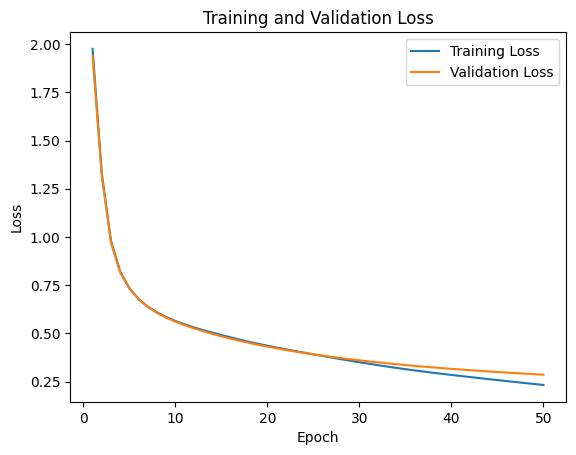

Overall Accuracy: 0.8173
Class-wise Accuracy: {0: 0.872, 1: 0.699, 2: 0.776, 3: 0.844, 4: 0.827, 5: 0.863, 6: 0.902, 7: 0.842, 8: 0.815, 9: 0.733}
Confusion Matrix:
[[872   1   1   3  32  34   4  36  16   1]
 [ 14 699  25   5  58  18 130   6  30  15]
 [  9   7 776  33  21  42  57  17  30   8]
 [ 11   7  33 844  14  35  27  12  10   7]
 [ 57  13  10   2 827  12  32  23  17   7]
 [ 10   5  31   6  19 863  35   3  27   1]
 [  4   4  19   3  40   9 902  13   4   2]
 [ 25   0   9   2  41   8  38 842  23  12]
 [ 24  16  23  42   7  13  46  11 815   3]
 [ 22  21  53   3  62   6  40  37  23 733]]
Class-wise F1 Scores: [0.8515625  0.78849408 0.78383838 0.86875965 0.77982084 0.84607843
 0.78061445 0.842      0.81704261 0.81945221]


In [69]:

layer_sizes = [X_train.shape[1], 256, num_classes]  # Input size, hidden layer size, output size
activations = ['relu', 'softmax']  # Activation functions for each layer
learning_rate = 0.01
epochs = 50
batch_size = 128

model = MLP(layer_sizes, activations, learning_rate)
model.train(X_train, y_train, X_val, y_val, epochs, batch_size)
accuracy, class_accuracy, cm, f1_scores = model.evaluate(X_test1, y_test)

print("Overall Accuracy:", accuracy)
print("Class-wise Accuracy:", class_accuracy)
print("Confusion Matrix:")
print(cm)
print("Class-wise F1 Scores:", f1_scores)

Test Accuracy: 0.8173


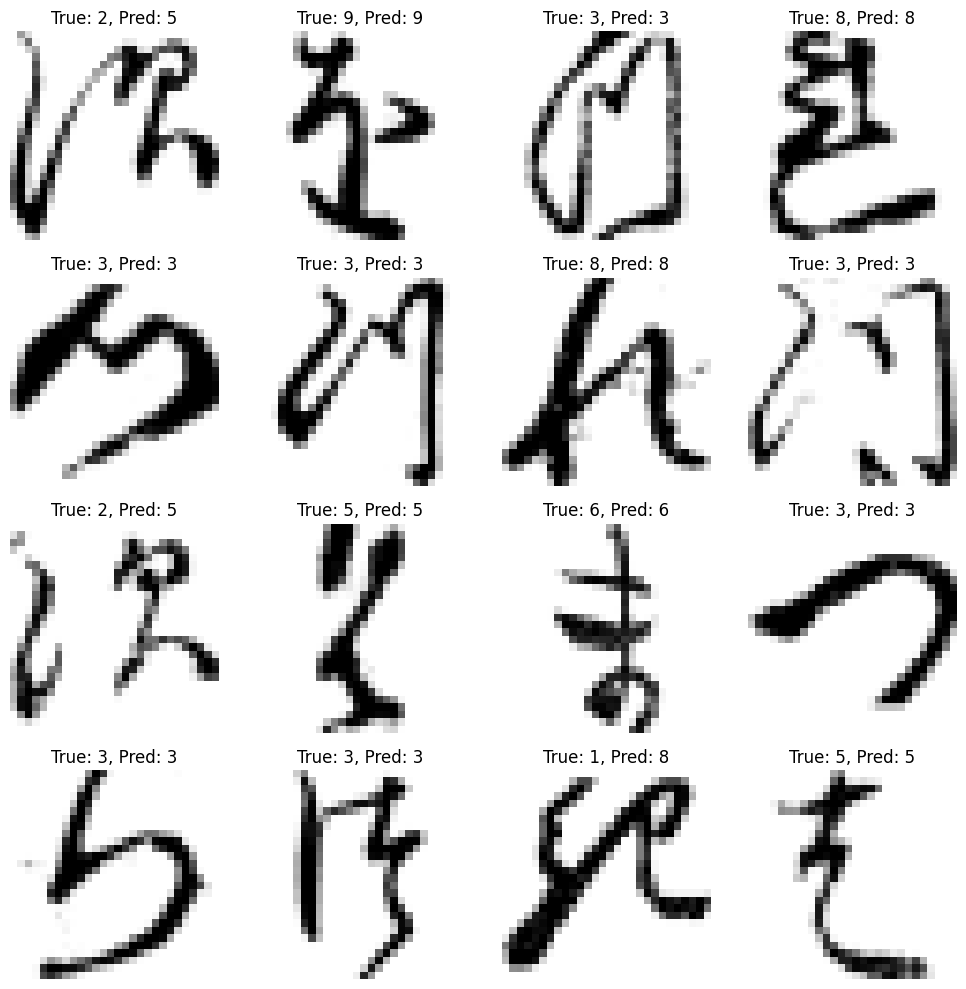

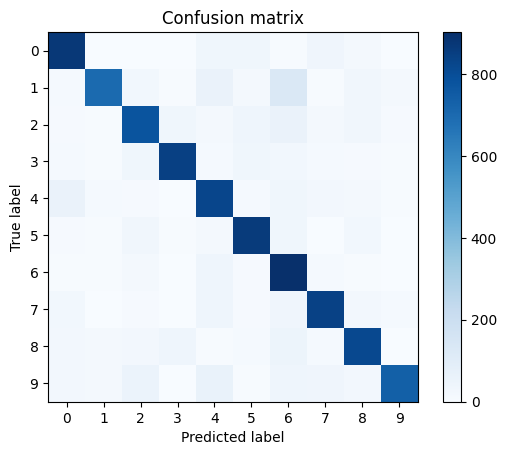

In [70]:
y_pred = model.predict(X_test1)
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy}")

# Plot sample predictions
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='binary')
    ax.set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

def plot_confusion_matrix(cm):
    """
    Plot the confusion matrix.

    Args:
    - cm (ndarray): Confusion matrix.
    """
    num_classes = cm.shape[0]
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


num_classes = 10
plot_confusion_matrix(cm)

Epoch 1/20, Training Loss: 1.973606351768804, Validation Loss: 1.944404386607323
Epoch 2/20, Training Loss: 1.3080722438328465, Validation Loss: 1.2960104010432887
Epoch 3/20, Training Loss: 0.9722351865252693, Validation Loss: 0.9660344688200578
Epoch 4/20, Training Loss: 0.8161299258406034, Validation Loss: 0.8180380152452047
Epoch 5/20, Training Loss: 0.7297874706983648, Validation Loss: 0.7350415332013491
Epoch 6/20, Training Loss: 0.6749163085106974, Validation Loss: 0.6806357572440445
Epoch 7/20, Training Loss: 0.6371137080041811, Validation Loss: 0.6413782239792621
Epoch 8/20, Training Loss: 0.6086937636887557, Validation Loss: 0.6111765207501063
Epoch 9/20, Training Loss: 0.5868212463038233, Validation Loss: 0.5867150435288478
Epoch 10/20, Training Loss: 0.5689288064256391, Validation Loss: 0.5660055344640886
Epoch 11/20, Training Loss: 0.5524733366825041, Validation Loss: 0.5477280746524228
Epoch 12/20, Training Loss: 0.5380586333895713, Validation Loss: 0.5314351247196771
Epo

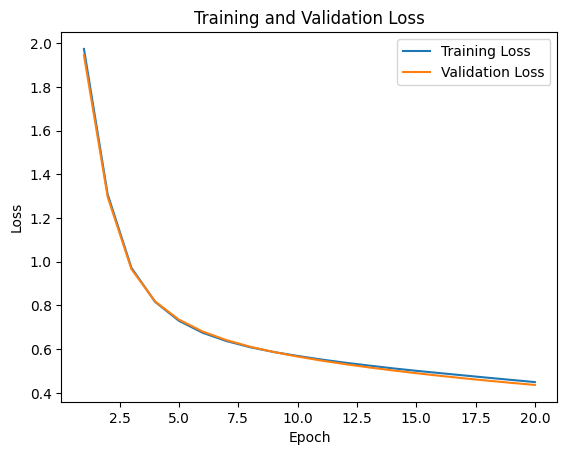

Epoch 1/20, Training Loss: 0.4081497947336573, Validation Loss: 0.4050207140077033
Epoch 2/20, Training Loss: 0.2891097214074189, Validation Loss: 0.28792092928706964
Epoch 3/20, Training Loss: 0.2120167379846309, Validation Loss: 0.2149066128328587
Epoch 4/20, Training Loss: 0.17215117807437427, Validation Loss: 0.17933200084213707
Epoch 5/20, Training Loss: 0.14924831054047677, Validation Loss: 0.15970489003319033
Epoch 6/20, Training Loss: 0.13442693146153356, Validation Loss: 0.14738330307835446
Epoch 7/20, Training Loss: 0.12457575860856254, Validation Loss: 0.13894497889956425
Epoch 8/20, Training Loss: 0.11792031137913402, Validation Loss: 0.13269347331843992
Epoch 9/20, Training Loss: 0.11310415140542308, Validation Loss: 0.12774917732117877
Epoch 10/20, Training Loss: 0.10892383224925294, Validation Loss: 0.12361951696269895
Epoch 11/20, Training Loss: 0.10561056311926866, Validation Loss: 0.12001831968037141
Epoch 12/20, Training Loss: 0.10288195447516878, Validation Loss: 0.

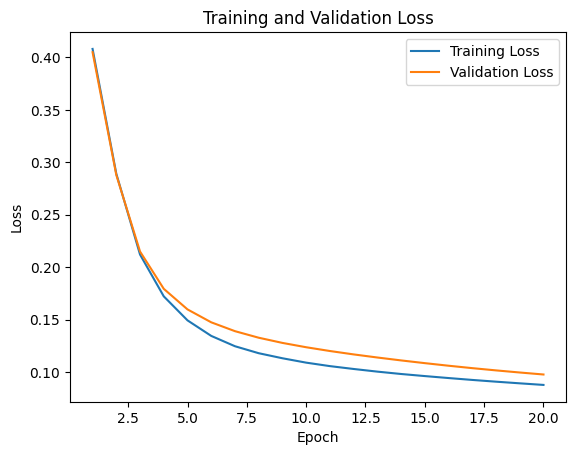

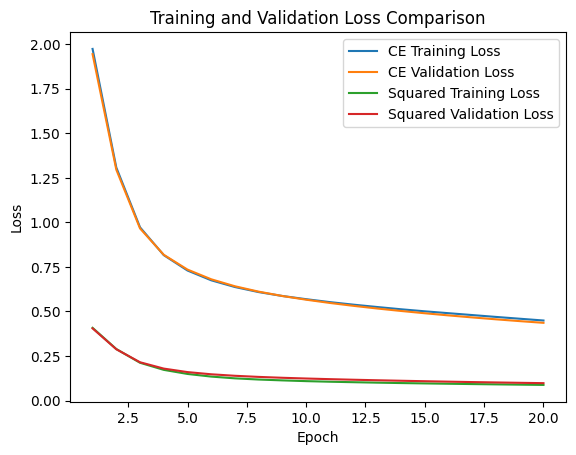

Cross-Entropy Accuracy: 0.7524
Squared Loss Accuracy: 0.7501


In [64]:
# @title Comparing cross entropy loss and squared error loss
# Initialize and train the MLP models with different loss functions
model_ce = MLP(layer_sizes, activations, learning_rate, loss='cross_entropy')
model_sq = MLP(layer_sizes, activations, learning_rate, loss='squared')

# Train models
model_ce.train(X_train, y_train, X_val, y_val, epochs, batch_size)
model_sq.train(X_train, y_train, X_val, y_val, epochs, batch_size)

# Evaluate models
accuracy_ce, _, _, _ = model_ce.evaluate(X_test1, y_test)
accuracy_sq, _, _, _ = model_sq.evaluate(X_test1, y_test)

# Plot training and validation loss curves for both models
plt.plot(range(1, epochs + 1), model_ce.training_losses, label='CE Training Loss')
plt.plot(range(1, epochs + 1), model_ce.validation_losses, label='CE Validation Loss')
plt.plot(range(1, epochs + 1), model_sq.training_losses, label='Squared Training Loss')
plt.plot(range(1, epochs + 1), model_sq.validation_losses, label='Squared Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Comparison')
plt.legend()
plt.show()

print("Cross-Entropy Accuracy:", accuracy_ce)
print("Squared Loss Accuracy:", accuracy_sq)


Epoch 1/20, Training Loss: 1.9814616731802641, Validation Loss: 1.9570199922892173
Epoch 2/20, Training Loss: 1.3132454528293676, Validation Loss: 1.3089048888321473
Epoch 3/20, Training Loss: 0.9713217104548659, Validation Loss: 0.9713442627216813
Epoch 4/20, Training Loss: 0.814800165873333, Validation Loss: 0.8193537196419997
Epoch 5/20, Training Loss: 0.7298494048696644, Validation Loss: 0.7352975910092376
Epoch 6/20, Training Loss: 0.6770270583715183, Validation Loss: 0.6809982571514063
Epoch 7/20, Training Loss: 0.6395577694415381, Validation Loss: 0.642410546843747
Epoch 8/20, Training Loss: 0.6112611924930116, Validation Loss: 0.6131247532921161
Epoch 9/20, Training Loss: 0.5884898407623662, Validation Loss: 0.5897627377563122
Epoch 10/20, Training Loss: 0.5699243545800743, Validation Loss: 0.5703353987143034
Epoch 11/20, Training Loss: 0.5539000362628187, Validation Loss: 0.5535524582877875
Epoch 12/20, Training Loss: 0.5400766390131706, Validation Loss: 0.5386291645898937
Epo

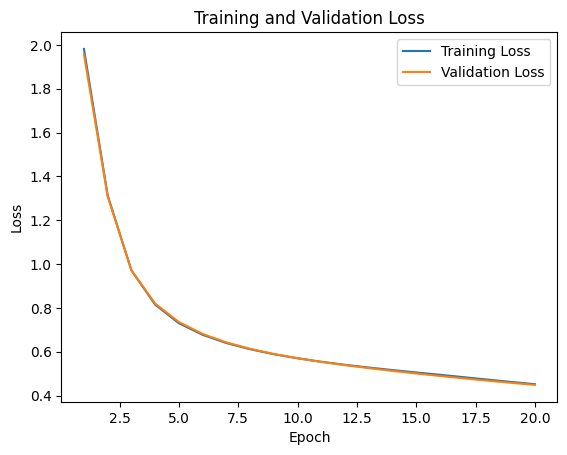

Epoch 1/20, Training Loss: 1.9815310746811414, Validation Loss: 1.94812621902535
Epoch 2/20, Training Loss: 1.321217007473008, Validation Loss: 1.305493713402776
Epoch 3/20, Training Loss: 0.9749525492178428, Validation Loss: 0.9685257400725894
Epoch 4/20, Training Loss: 0.815331601860229, Validation Loss: 0.8176496363191248
Epoch 5/20, Training Loss: 0.7291888512054948, Validation Loss: 0.7337743274737831
Epoch 6/20, Training Loss: 0.6753757304692242, Validation Loss: 0.6787310799918471
Epoch 7/20, Training Loss: 0.6372651368221564, Validation Loss: 0.6390133760063619
Epoch 8/20, Training Loss: 0.6083267151750429, Validation Loss: 0.6083179754881476
Epoch 9/20, Training Loss: 0.5854400484065234, Validation Loss: 0.583292374190155
Epoch 10/20, Training Loss: 0.5660867815466579, Validation Loss: 0.5621508698047907
Epoch 11/20, Training Loss: 0.5492861675948134, Validation Loss: 0.5436627278189089
Epoch 12/20, Training Loss: 0.5346048406571854, Validation Loss: 0.5271870656629848
Epoch 1

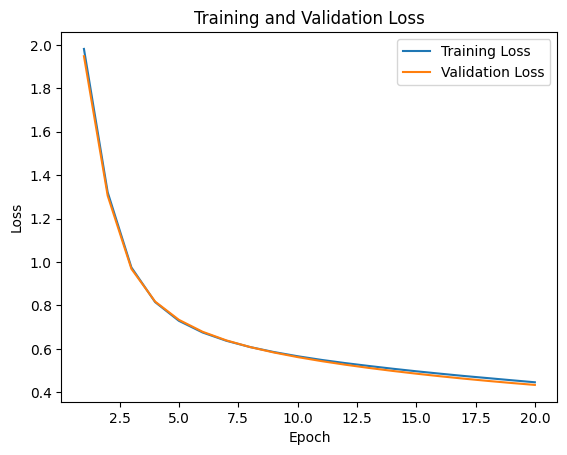

Epoch 1/20, Training Loss: 1.97175714178222, Validation Loss: 1.942379598522024
Epoch 2/20, Training Loss: 1.3205348095579375, Validation Loss: 1.3061347861598667
Epoch 3/20, Training Loss: 0.9857803205419193, Validation Loss: 0.977957666888127
Epoch 4/20, Training Loss: 0.8258508442212593, Validation Loss: 0.8278006567766855
Epoch 5/20, Training Loss: 0.7374038966660849, Validation Loss: 0.7432949600227731
Epoch 6/20, Training Loss: 0.6821002268709239, Validation Loss: 0.6879508471597736
Epoch 7/20, Training Loss: 0.6445743074642335, Validation Loss: 0.648424999273945
Epoch 8/20, Training Loss: 0.6169211436423685, Validation Loss: 0.6181471054551485
Epoch 9/20, Training Loss: 0.5952333158015506, Validation Loss: 0.5936148866866537
Epoch 10/20, Training Loss: 0.5768382328994007, Validation Loss: 0.5728211320755061
Epoch 11/20, Training Loss: 0.5603170663601086, Validation Loss: 0.5546557714191234
Epoch 12/20, Training Loss: 0.5455364571188108, Validation Loss: 0.5384660244163424
Epoch 

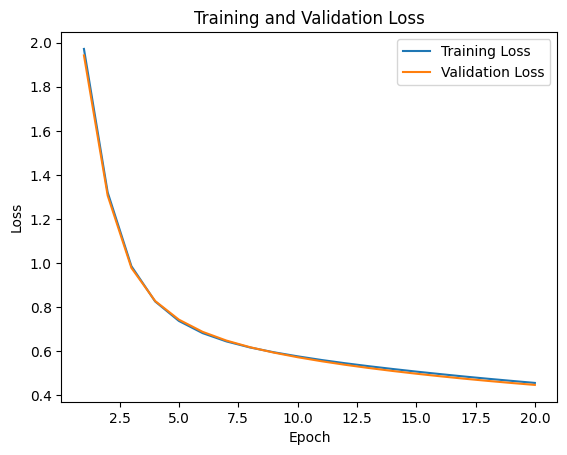

Epoch 1/20, Training Loss: 1.986967405458431, Validation Loss: 1.955218464329094
Epoch 2/20, Training Loss: 1.3514561035964658, Validation Loss: 1.337683590328027
Epoch 3/20, Training Loss: 0.9977417173298039, Validation Loss: 0.9949984661942285
Epoch 4/20, Training Loss: 0.8385975558970523, Validation Loss: 0.8433043515324581
Epoch 5/20, Training Loss: 0.7539246984653811, Validation Loss: 0.7616554021242569
Epoch 6/20, Training Loss: 0.701323147210619, Validation Loss: 0.7093524138744283
Epoch 7/20, Training Loss: 0.6647505828521328, Validation Loss: 0.6721900871852811
Epoch 8/20, Training Loss: 0.6371944716980452, Validation Loss: 0.6440548941932595
Epoch 9/20, Training Loss: 0.6151059465412002, Validation Loss: 0.6218158761031989
Epoch 10/20, Training Loss: 0.5971015271696478, Validation Loss: 0.6035253256660523
Epoch 11/20, Training Loss: 0.5820757555342119, Validation Loss: 0.5880855271978979
Epoch 12/20, Training Loss: 0.5692325051890659, Validation Loss: 0.5746444086136214
Epoch

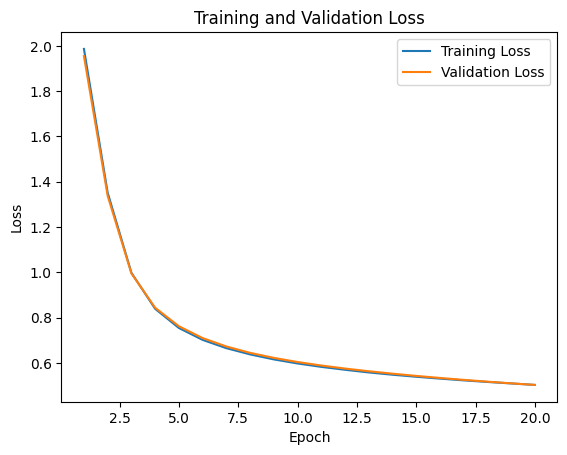

IndexError: invalid index to scalar variable.

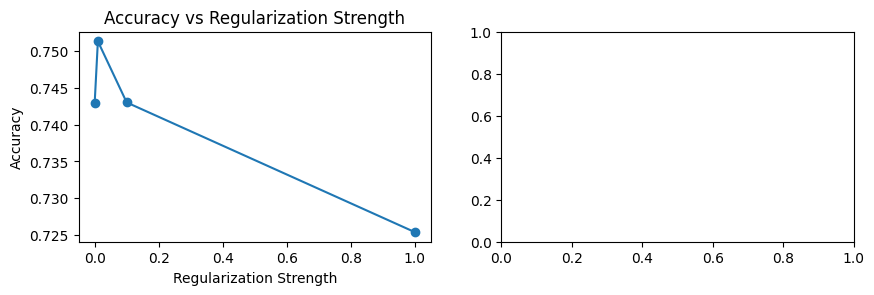

In [67]:
# @title Comparision with different regularization strengths
import numpy as np
import matplotlib.pyplot as plt

# Define regularization constants to compare
regularization_strengths = [0, 0.01, 0.1, 1]

# Initialize lists to store evaluation results for each regularization strength
accuracies = []
class_accuracies = []
confusion_matrices = []
f1_scores = []

# Iterate over each regularization strength
for regularization_strength in regularization_strengths:
    # Initialize and train the model
    model = MLP(layer_sizes, activations, learning_rate, regularization_strength)
    model.train(X_train, y_train, X_val, y_val, epochs, batch_size)

    # Evaluate the model
    accuracy, class_accuracy, cm, f1 = model.evaluate(X_test1, y_test)

    # Append evaluation results to lists
    accuracies.append(accuracy)
    class_accuracies.append(class_accuracy)
    confusion_matrices.append(cm)
    f1_scores.append(f1)

# Plot the comparison results
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(regularization_strengths, accuracies, marker='o')
plt.xlabel('Regularization Strength')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Regularization Strength')

plt.subplot(2, 2, 2)
x_values = range(10)  # Assuming there are 10 classes
for i, strength in enumerate(regularization_strengths):
    plt.plot(x_values, [class_accuracies[i] for class_accuracies in class_accuracies[i]], label=f'Strength={strength}', marker='o')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Class-wise Accuracy')
plt.show()

plt.subplot(2, 2, 3)
for i, strength in enumerate(regularization_strengths):
    plt.plot(range(10), f1_scores[i], label=f'Strength={strength}', marker='o')
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Regularization Strength')
plt.legend()

plt.tight_layout()
plt.show()
